### Imagenet

Largest image classification dataset at this point of time.

Url: http://image-net.org/

Our setup: classify from a set of 1000 classes.

In [1]:
#classes' names are stored here
import pickle
classes = pickle.load(open('classes.pkl','rb'))
print (classes[::100])

['tench, Tinca tinca', 'black swan, Cygnus atratus', 'Tibetan terrier, chrysanthemum dog', 'tiger beetle', "academic gown, academic robe, judge's robe", 'cliff dwelling', 'hook, claw', 'paper towel', 'slot, one-armed bandit', 'water tower']


### Using pre-trained model: inception
Keras has a number of models for which you can use pre-trained weights. The interface is super-straightforward:

In [2]:
import tensorflow as tf
#gpu_options = tf.GPUOptions(allow_growth=True, per_process_gpu_memory_fraction=0.1)
#s = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))
s = tf.InteractiveSession()

In [3]:
import keras
import keras.applications as zoo

model = zoo.InceptionV3(include_top=True, weights='imagenet')

Using TensorFlow backend.


In [4]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 299, 299, 3)   0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 149, 149, 32)  864         input_1[0][0]                    
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 149, 149, 32)  96          conv2d_1[0][0]                   
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 149, 149, 32)  0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

### Predict class probabilities

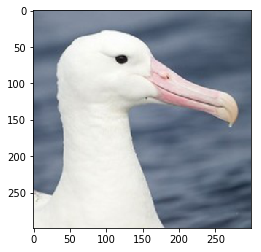

top-10 classes are:
0.9254	albatross
0.0017	turnstile
0.0008	drake
0.0005	collie
0.0005	Shetland sheepdog
0.0004	hammerhead
0.0004	nipple
0.0004	cello
0.0004	Polaroid camera


In [5]:
import matplotlib.pyplot as plt
from scipy.misc import imresize
%matplotlib inline

img = imresize(plt.imread('sample_images/albatross.jpg'), (299,299))
plt.imshow(img)
plt.show()

img_preprocessed = zoo.inception_v3.preprocess_input(img[None].astype('float32'))

probs = model.predict(img_preprocessed)

labels = probs.ravel().argsort()[-1:-10:-1]
print ('top-10 classes are:')
for l in labels:
    print ('%.4f\t%s' % (probs.ravel()[l], classes[l].split(',')[0]))



### Having fun with pre-trained nets

In [6]:
!wget http://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg -O img.jpg

--2017-07-21 15:37:43--  http://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg
Resolving cdn.com.do... 35.184.12.94
Connecting to cdn.com.do|35.184.12.94|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51048 (50K) [image/jpeg]
Saving to: ‘img.jpg’

img.jpg             100%[===================>]  49.85K   239KB/s    in 0.2s    

2017-07-21 15:37:44 (239 KB/s) - ‘img.jpg’ saved [51048/51048]



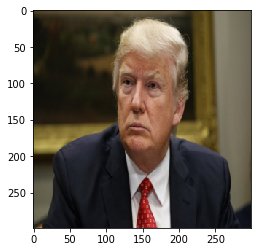

top-10 classes are:
0.2098	suit
0.0802	groom
0.0263	Windsor tie
0.0110	wig
0.0107	oboe
0.0096	academic gown
0.0068	bow tie
0.0057	notebook
0.0055	mortarboard


In [9]:
img = imresize(plt.imread('img.jpg'), (299,299))
plt.imshow(img)
plt.show()

img_preprocessed = zoo.inception_v3.preprocess_input(img[None].astype('float32'))

probs = model.predict(img_preprocessed)

labels = probs.ravel().argsort()[-1:-10:-1]
print ('top-10 classes are:')
for l in labels:
    print ('%.4f\t%s' % (probs.ravel()[l], classes[l].split(',')[0]))



### How do you reuse layers

Since model is just a sequence of layers, one can apply it as any other Keras model. Then you can build more layers on top of it, train them and maybe fine-tune "body" weights a bit.

In [10]:
img = tf.placeholder('float32',[None,299,299,3])

neck = zoo.InceptionV3(include_top=False, weights='imagenet')(img)

hid = keras.layers.GlobalMaxPool2D()(neck)

hid = keras.layers.Dense(512,activation='relu')(hid)

out = keras.layers.Dense(10,activation='softmax')(hid)

#<...> loss, training, etc.

87793664/87910968 [============================>.] - ETA: 0s